# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_environment = "/Users/coopg/GitHub/assignment-4/data/Arrigetch_Peaks_Environmental_Data.csv"
file_species = "/Users/coopg/GitHub/assignment-4/data/Arrigetch_Peaks_Species_Data.csv"

env = pd.read_csv(file_environment)
species = pd.read_csv(file_species)

In [4]:
env = env.replace(-9999., np.NaN)
species = species.replace(-9999., np.NaN)

In [5]:
len(pd.unique(env.PLANT_COMMUNITY_NAME))

51

In [6]:
needed_columns = ["ELEVATION","ASPECT","SLOPE","COVER_LITTER_LAYER","COVER_OPEN_WATER","COVER_ROCK","COVER_CRUST","COVER_BARE_SOIL"]

env[needed_columns].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


In [50]:
merged_data_frame = pd.merge(left=env, right=species, how='left', left_on='TURBOVEG_PLOT_NUMBER', right_on='TURBOVEG_PLOT_NUMBER')
merged_data_frame.loc[merged_data_frame.isnull().any(axis=1),:]
print(len(merged_data_frame.loc[merged_data_frame.isnull().any(axis=1),:]))

422


In [8]:
population_by_species = {}

for each in species.columns:
    if each != 'TURBOVEG_PLOT_NUMBER': # for all species columns
       population_by_species[each] = species[each][species[each]>0].shape[0]

list_of_species = []
for each in population_by_species:
    list_of_species.append(each)

biggest_species = ""
biggest_species_population = 0

counter = 0
for each in population_by_species:
    if population_by_species[list_of_species[counter]] > biggest_species_population:
        biggest_species_population = population_by_species[list_of_species[counter]]
        biggest_species = [list_of_species[counter]]
    counter += 1

print(biggest_species[0])

Cetraria islandica


In [9]:
myList = [0]
counter = 0
for each in range(0,439):
    for col in species.columns:
        if col != "TURBOVEG_PLOT_NUMBER":
            myList[each] += (species.loc[each,col])
            myList.append(0)

del myList[439:]

species["totals"] = myList
print(species)

     TURBOVEG_PLOT_NUMBER  Abietinella abietina  Acarospora schleicheri  \
0                   10925                   0.0                     0.0   
1                   10926                   0.0                     0.0   
2                   10927                   0.0                     0.0   
3                   10928                   0.0                     0.0   
4                   10929                   0.0                     0.0   
..                    ...                   ...                     ...   
434                 11359                   0.0                     0.0   
435                 11360                   0.0                     0.0   
436                 11361                   0.0                     0.0   
437                 11362                   0.5                     0.0   
438                 11363                   1.0                     0.0   

     Aconitum delphinifolium delphinifolium  Alectoria ochroleuca  \
0                             

In [10]:
print("25% is counted twice, both in species cover class 2 and 3")

25% is counted twice, both in species cover class 2 and 3


## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




In [11]:
import matplotlib.pyplot as plt

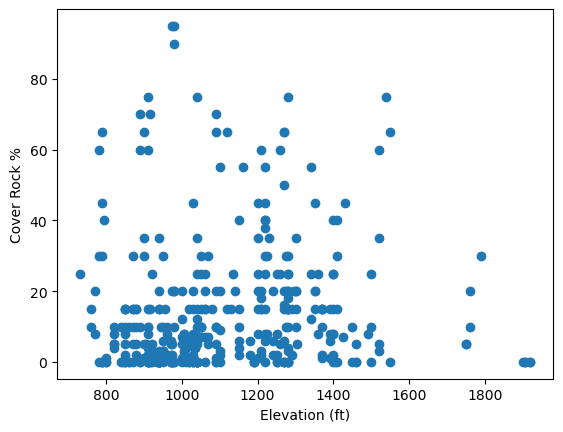

There appears to be no relationship between the two variables


In [12]:
df_sub = env.loc[(env['ELEVATION']>0) & (env['COVER_ROCK'].notnull()),:].reset_index(drop=True)
figure, ax = plt.subplots()
ax.scatter(df_sub['ELEVATION'], df_sub['COVER_ROCK'])
ax.set_xlabel('Elevation (ft)')
ax.set_ylabel('Cover Rock %')
plt.show()
print("There appears to be no relationship between the two variables")

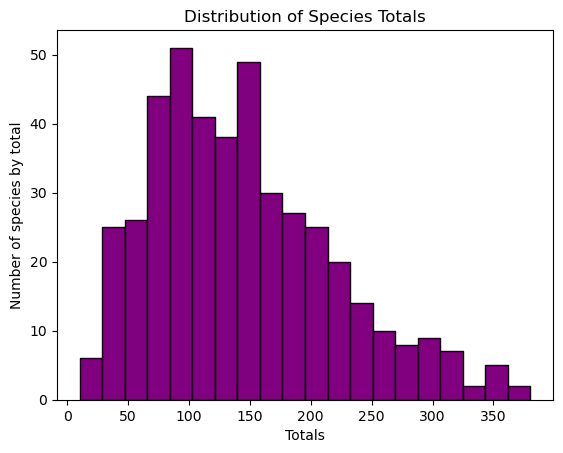

count    439.000000
mean     144.146469
std       74.729961
min       10.000000
25%       87.000000
50%      132.000000
75%      188.250000
max      380.500000
Name: totals, dtype: float64

In [13]:
figure, ax = plt.subplots()
ax.hist(species["totals"],bins=20, color="purple", edgecolor='black')
ax.set_xlabel('Totals')
ax.set_ylabel('Number of species by total')
ax.set_title('Distribution of Species Totals')
plt.show()

species["totals"].describe()